In [16]:
def params(path,nam,directed):
    name = path+nam+".csv"
    stri = ["non-strict"]
    be = ["bet", "bet_exact"]
    if directed:
        name = name+"_directed_exp/"
    else:
        name = name+"_undirected_exp/"
    #path = path + "_boost/"
    cost_type = [["shortest","passive"], ["shortest","active"], ["shortestfastest","passive"] , ["shortestfastest","active"], ["foremost","passive"] , ["shortestforemost","passive"]]
    app = [2,5,10,20,40,60,-1]
    return (name,be,stri,cost_type,app)

In [17]:
def info(name):
    f = open(name+"info_-1.txt", "r")
#     print(name,end='')
    i = 0
    for x in f:
        x = x[:-1]
        res = x.split(" ")
        print(" & $"+str(res[-1])[:5]+"$",end="")
        i += 1
    print("\\\\")

In [18]:
def charact(name):
#     print(name+"info_-1.txt")
    f = open(name+"info_-1.txt", "r")
#     print(name,end='')
    i = 0
    for x in f:
        x = x[:-1]
        res = x.split(" ")
        if i == 0:
            n = int(res[-1])
        if i == 1:
            T = int(res[-1])
        if i == 2:
            m = int(res[-1])
        i = i + 1
    return (n,T)

In [19]:
def res_dic(path, be,stri,cost_type,app,T):
    res = dict()
    res_bet = dict()
    res_sum_node = dict()
    res_sum_time = dict()

    for b in be:
        for st in stri:
            for co in cost_type:
                for ap in app:
                    #print(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+".txt")
                    f = open(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+".txt", "r")
                    if ap not in res:
                        res[ap] = dict()
                    if ap not in res_bet:
                        res_bet[ap] = dict()
                    if ap not in res_sum_node:
                        res_sum_node[ap] = dict()
                    if ap not in res_sum_time:
                        res_sum_time[ap] = dict()

                    if st not in res[ap]:
                        res[ap][st] = dict()
                    if st not in res_bet[ap]:
                        res_bet[ap][st] = dict()
                    if st not in res_sum_node[ap]:
                        res_sum_node[ap][st] = dict()
                    if st not in res_sum_time[ap]:
                        res_sum_time[ap][st] = dict()

                    if b not in res_bet[ap][st]:
                        res_bet[ap][st][b] = dict()
                    res_bet[ap][st][b][co[0]+"_"+co[1]] = []

                    if b not in res[ap][st]:
                        res[ap][st][b] = dict()

                    if b not in res_sum_node[ap][st]:
                        res_sum_node[ap][st][b] = dict()
                    if b not in res_sum_time[ap][st]:
                        res_sum_time[ap][st][b] = dict()

                    if co[1] not in res[ap][st][b]:
                        res[ap][st][b][co[1]] = dict()
                    if co[1] not in res_sum_node[ap][st][b]:
                        res_sum_node[ap][st][b][co[1]] = dict()
                    if co[1] not in res_sum_time[ap][st][b]:
                        res_sum_time[ap][st][b][co[1]] = dict()

                    res[ap][st][b][co[1]][co[0]] = []

                    res_sum_time[ap][st][b][co[1]][co[0]] = [0 for i in range(T)]
                    res_sum_node[ap][st][b][co[1]][co[0]] = [0 for i in range(n)]



                    i = 0
                    for x in f:
                        res_sum_node[ap][st][b][co[1]][co[0]][i//T] +=  float(x)
                        res_sum_time[ap][st][b][co[1]][co[0]][i%T] += float(x)
                        res[ap][st][b][co[1]][co[0]].append(float(x))
                        res_bet[ap][st][b][co[0]+"_"+co[1]].append(float(x))
                        i += 1
    return (res,res_bet,res_sum_node,res_sum_time)

In [20]:
#min max
import scipy.stats as stats
import matplotlib.pyplot as plt
def min_max_cruve(name,points,col,res,d,n):
    s = "non-strict"
    mini = -1
    maxi = -1
    color = col
    for co in cost_type:
        res_ap = []
        ty = co[1]
        c = co[0]
        i = points[-2]
        tab = [ stats.kendalltau(res[-1][s]["bet_exact"][ty][c], res[points[j]][s]["bet_exact"][ty][c])[0] for j in range(0,len(points)) ]
        meas = stats.kendalltau(res[-1][s]["bet_exact"][ty][c], res[i][s]["bet_exact"][ty][c])[0]
        if mini == -1:
            mini = meas
            val_min = (ty,c)
            tab_min = tab[:]
        if maxi == -1:
            maxi = meas
            val_max = (ty,c)
            tab_max = tab[:]
        if meas < mini:
            mini = meas
            val_min = (ty,c)
            tab_min = tab[:]
        if meas > maxi:
            val_max = (ty,c)
            maxi = meas
            tab_max = tab[:]
    d[name] = dict()
    d[name][(0.5,val_min,color)] = tab_min,[ points[i]/n for i in range(0,len(points)-1) ]+[1]
    d[name][(1,val_max,color)] = tab_max,[ points[i]/n for i in range(0,len(points)-1) ]+[1]

In [21]:
import scipy.stats as stats
import matplotlib.pyplot as plt
def kendallrank(res,node,time,s,ty1,c1,ty2,c2):
    kendall_print(res,s,ty1,c1,ty2,c2)
    kendall_print(node,s,ty1,c1,ty2,c2)
    kendall_print(time,s,ty1,c1,ty2,c2)
    
def kendall_print(res,s,ty,c,ty2,d):
    print ("&$ "+str(stats.kendalltau(res[-1][s]["bet_exact"][c][ty], res[-1][s]["bet_exact"][d][ty2])[0])[:4]+"$",end="")

In [34]:
path = "/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/"
d = dict()
names = [["ht09",False,"green"], ["highschool_2011",False,"orange"], ["hospital_ward",False,"blue"],["ht09",True,"red"]]
for nam,dire,col in names:
    path_add,be,stri,cost_type,app = params(path,nam,dire)
#     print(path_add)
    n, T = charact(path_add)
    res,res_bet,res_sum_node,res_sum_time = res_dic(path_add,be,stri,cost_type,app,T)
    name_curve = nam
    if dire:
        name_curve += "_d"
    min_max_cruve(name_curve,app,col,res,d,n)
    res,res_bet,res_sum_node,res_sum_time = dict(),dict(),dict(),dict()


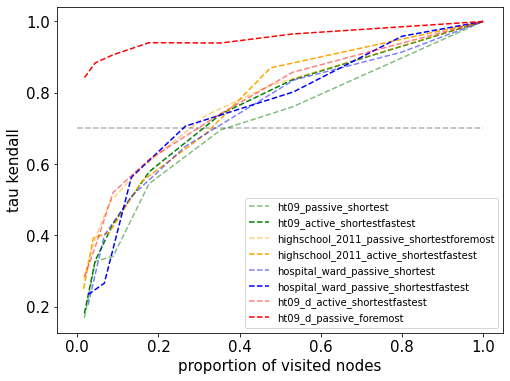

In [35]:
#for all 0.75 for nodes 0.8
plt.figure(figsize=(8,6))
for nam in d.keys():
    for elem in d[nam].keys():
        x,co,z = elem
        
        plt.plot(d[nam][elem][1],d[nam][elem][0],'--', label=nam+"_"+co[0]+"_"+co[1], color=z,alpha = x)
plt.ylabel('tau kendall', fontsize=15)
plt.xlabel('proportion of visited nodes', fontsize=15)
plt.plot([0,1],[0.7,0.7], "--", color="black",alpha=0.3)
leg = plt.legend(loc='best', fontsize=10)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
# leg.get_frame().set_alpha(0.5)
plt.savefig("out.png")
plt.show()

In [33]:
path = "/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/"
d = dict()
names = [ ["primaryschool",True,"orange"],
    ["highschool_2011",True,"orange"],["highschool_2011",False,"orange"],
         ["highschool_2012",True,"orange"],["highschool_2012",False,"orange"],
         ["hospital_ward",True,"blue"],["hospital_ward",False,"blue"],
         ["ht09",True,"red"],["ht09",False,"green"],
         ["workplace_2013",True,"red"],["workplace_2013",False,"green"],
        ]
for nam,dire,col in names:
    path_add,be,stri,cost_type,app = params(path,nam,dire)
    name_curve = nam
    if dire:
        name_curve += " (d)"
    print(name_curve,end="")
    info(path_add)
    #n, T = charact(path_add)
    #res,res_bet,res_sum_node,res_sum_time = res_dic(path_add,be,stri,cost_type,app,T)

primaryschool (d) & $242$ & $3100$ & $12577$ & $3188.$ & $595.7$ & $595.1$ & $806.2$ & $471.1$ & $718.6$\\
highschool_2011 (d) & $126$ & $5609$ & $28539$ & $42.15$ & $92.77$ & $20.92$ & $95.46$ & $16.70$ & $21.58$\\
highschool_2011 & $126$ & $5609$ & $28539$ & $2103.$ & $266.1$ & $536.1$ & $320.8$ & $481.8$ & $678.7$\\
highschool_2012 (d) & $180$ & $11273$ & $45047$ & $377.4$ & $403.6$ & $124.1$ & $418.6$ & $101.2$ & $139.8$\\
highschool_2012 & $180$ & $11273$ & $45047$ & $6842.$ & $922.8$ & $1548.$ & $1131.$ & $1387.$ & $2113.$\\
hospital_ward (d) & $75$ & $9453$ & $32424$ & $229.8$ & $93.49$ & $55.18$ & $95.50$ & $33.39$ & $57.88$\\
hospital_ward & $75$ & $9453$ & $32424$ & $4298.$ & $305.3$ & $741.5$ & $347.6$ & $498.5$ & $875.6$\\
ht09 (d) & $113$ & $5246$ & $20818$ & $235.2$ & $91.26$ & $55.55$ & $114.7$ & $50.08$ & $63.69$\\
ht09 & $113$ & $5246$ & $20818$ & $1209.$ & $161.7$ & $325.5$ & $212.2$ & $266.4$ & $375.0$\\
workplace_2013 (d) & $92$ & $7104$ & $9827$ & $7.891$ & $43.81$

In [7]:
#passive / active
path = "/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/"
d = dict()
names = [ ["primaryschool",True,"orange"],
    ["highschool_2011",True,"orange"],["highschool_2011",False,"orange"],
         ["highschool_2012",True,"orange"],["highschool_2012",False,"orange"],
         ["hospital_ward",True,"blue"],["hospital_ward",False,"blue"],
         ["ht09",True,"red"],["ht09",False,"green"],
         ["workplace_2013",True,"red"],["workplace_2013",False,"green"],
        ]
for nam,dire,col in names:
    path_add,be,stri,cost_type,app = params(path,nam,dire)
    #cost_type = [["shortest","passive"], ["shortest","active"], ["shortestfastest","passive"] , ["shortestfastest","active"]]
    cost_type = [["foremost","passive"] , ["shortestforemost","passive"]]
    name_curve = nam
    if dire:
        name_curve += " (d)"
    print(name_curve,end="")
    n, T = charact(path_add)
    res,res_bet,res_sum_node,res_sum_time = res_dic(path_add,be,stri,cost_type,app,T)
    kendallrank(res,res_sum_node,res_sum_time,"non-strict","foremost","passive","shortestforemost","passive")
    #kendallrank(res,res_sum_node,res_sum_time,"non-strict","shortestfastest","active","shortestfastest","passive")
    print("\\\\")
    res,res_bet,res_sum_node,res_sum_time = dict(),dict(),dict(),dict()

primaryschool (d)

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:4868: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


&$ 0.72$&$ 0.67$&$ 0.75$\\
highschool_2011 (d)&$ 0.89$&$ 0.82$&$ 0.77$\\
highschool_2011&$ nan$&$ nan$&$ nan$\\
highschool_2012 (d)&$ 0.88$&$ 0.86$&$ 0.74$\\
highschool_2012&$ nan$&$ nan$&$ nan$\\
hospital_ward (d)&$ 0.83$&$ 0.82$&$ 0.58$\\
hospital_ward&$ nan$&$ nan$&$ nan$\\
ht09 (d)&$ 0.76$&$ 0.55$&$ 0.58$\\
ht09&$ nan$&$ nan$&$ nan$\\
workplace_2013 (d)&$ 0.91$&$ 0.88$&$ 0.82$\\
workplace_2013&$ nan$&$ nan$&$ nan$\\
